In [ ]:
from Modulation import get_modulated_rates

CUDA GPU found, performing calculations on GPU
Using form factor calculated from file: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../QCDark/results/Si_final.hdf5
dmrates.calculate_rates(1.0,modulated,2,1,integrate=True,DoScreen=True,isoangle=0,useVerne=True,calcErrors=None) 


c:\Users\Ansh\anaconda3\envs\dmerates\Lib\site-packages\torch\__init__.py:1236: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\tensor\python_tensor.cpp:436.)
  _C._set_default_tensor_type(t)
c:\Users\Ansh\anaconda3\envs\dmerates\Lib\site-packages\torchquad\integration\simpson.py:76: UserWarning: N per dimension cannot be even due to necessary subdivisions. N per dim will now be changed to the next lower integer, i.e. 1250 -> 1249.
  warnings.warn(
c:\Users\Ansh\anaconda3\envs\dmerates\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # ty

Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_LM/mDM_1_0_MeV_sigmaE_1e-34_cm2/DM_Eta_theta_0.txt
Shapes - q_eV: torch.Size([1249, 1]), E_eV: torch.Size([1, 500])
torch.Size([1249, 500])
dmrates.calculate_rates(1.0,modulated,2,1,integrate=True,DoScreen=True,isoangle=1,useVerne=True,calcErrors=None) 
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_LM/mDM_1_0_MeV_sigmaE_1e-34_cm2/DM_Eta_theta_1.txt
Shapes - q_eV: torch.Size([1249, 1]), E_eV: torch.Size([1, 500])
torch.Size([1249, 500])
dmrates.calculate_rates(1.0,modulated,2,1,integrate=True,DoScreen=True,isoangle=2,useVerne=True,calcErrors=None) 
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_LM/mDM_1_0_MeV_sigmaE_1e-34_cm2/DM_Eta_theta_2.txt
Shapes - q_eV: torch.Size([1249, 1]), E_eV: torch.Size([1, 500])
torch.Size([1249, 5

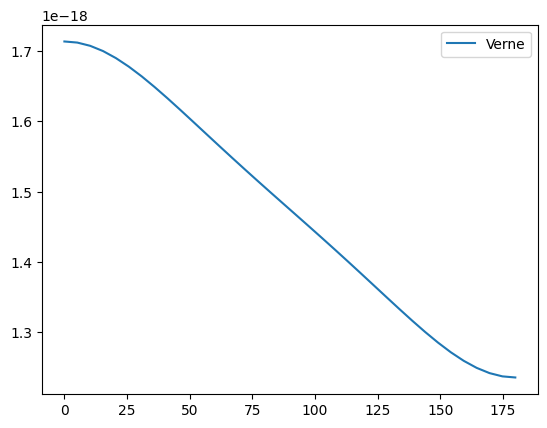

In [2]:
test_mX = 1. #MeV
test_cs = 1e-34
FDMn = 2
ne = 1
useQCDark = True
i_v,r_v = get_modulated_rates('Si',test_mX,test_cs,FDMn,ne,useVerne=True,useQCDark=useQCDark)

# i_d,r_d = get_modulated_rates('Si',test_mX,test_cs,FDMn,ne,useVerne=False,useQCDark=useQCDark)

import matplotlib.pyplot as plt

plt.plot(i_v,r_v,label='Verne')
# plt.plot(i_d,r_d,label='DaMaSCUS')
plt.legend()
plt.show()
plt.close()


In [ ]:
(r_v[0] - r_v[-1]) / 2

In [ ]:
test_mX = 30.89 #MeV
test_cs = 1e-39
FDMn = 0
ne = 2
useQCDark = True
i_v,r_v = get_modulated_rates('Ar',test_mX,test_cs,FDMn,ne,useVerne=True,useQCDark=useQCDark)

# i_d,r_d = get_modulated_rates('Xe',test_mX,test_cs,FDMn,ne,useVerne=False,useQCDark=useQCDark)

import sys
sys.path.append('../wimprates_mod/')


import matplotlib.pyplot as plt

plt.plot(i_v,r_v,label='Verne')
# plt.plot(i_d,r_d,label='DaMaSCUS')

plt.legend()
plt.show()
plt.close()
import numpy as np
print((np.max(r_v) - np.min(r_v) )/ 2)


In [ ]:
from Modulation import get_amplitude
get_amplitude(test_mX,test_cs,0,'Ar',0,180,ne,fractional=False,useVerne=True,fromFile= False)

In [ ]:
test_mX = 10. #MeV
test_cs = 1e-34
FDMn = 0
ne = 1
useQCDark = True
i_v,r_v = get_modulated_rates('Ar',test_mX,test_cs,FDMn,ne,useVerne=True,useQCDark=useQCDark)

i_d,r_d = get_modulated_rates('Ar',test_mX,test_cs,FDMn,ne,useVerne=False,useQCDark=useQCDark)

import matplotlib.pyplot as plt

plt.plot(i_v,r_v,label='Verne')
plt.plot(i_d,r_d,label='DaMaSCUS')
plt.legend()
plt.show()
plt.close()


In [ ]:
overwrite = False
for doScreen in [True,False]:
    for useVerne in [True]:
        for useQCDark in [False,True]:
            for FDMn in [0,2]:
                for material in ['Si','Xe','Ar']:
                    if doScreen == False and useQCDark == True:
                        continue
                    generate_modulated_rates(material,FDMn,useQCDark=useQCDark,useVerne=useVerne,doScreen=doScreen,overwrite=overwrite)

c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\Modulation.py:82: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


CUDA GPU found, performing calculations on GPU


  0%|          | 0/3162 [00:00<?, ?it/s]

Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-32_cm2/DM_Eta_theta_1.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-32_cm2/DM_Eta_theta_0.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-32_cm2/DM_Eta_theta_1.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-32_cm2/DM_Eta_theta_2.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-32_cm2/DM_Eta_theta_3.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigm

  0%|          | 4/3162 [00:01<17:58,  2.93it/s]

Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-32_cm2/DM_Eta_theta_35.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-33_cm2/DM_Eta_theta_1.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-33_cm2/DM_Eta_theta_0.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-33_cm2/DM_Eta_theta_1.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-33_cm2/DM_Eta_theta_2.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sig

  0%|          | 5/3162 [00:02<28:30,  1.85it/s]

Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-33_cm2/DM_Eta_theta_35.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-34_cm2/DM_Eta_theta_1.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-34_cm2/DM_Eta_theta_0.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-34_cm2/DM_Eta_theta_1.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sigmaE_1e-34_cm2/DM_Eta_theta_2.txt
Using Halo Data from: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../halo_data/modulated/Verne_Scr/mDM_0_57_MeV_sig

In [ ]:
from Modulation import get_modulated_rates,fitted_rates
import matplotlib.pyplot as plt
import numpy as np
mX = 0.6
sigmaE = 1e-30
FDMn = 2
i,r = get_modulated_rates(mX,sigmaE,FDMn,useVerne=False,calcError=None,ne=1,useQCDark=True)
i,rhigh = get_modulated_rates(mX,sigmaE,FDMn,useVerne=False,calcError='High',ne=1,useQCDark=True)
iv,rv = get_modulated_rates(mX,sigmaE,FDMn,useVerne=True,calcError=None,ne=1,useQCDark=True)

anglegrid,fit_vector,paramters,errors = fitted_rates(i,r,rates_err=rhigh-r,linear=False)
fit = fit_vector[0]
fit_upper = fit_vector[1]
fit_lower = fit_vector[2]


filedataqcark  = np.loadtxt(f'damascus_modulated_rates_screened_qcdark/mX_{str(mX).replace('.','_')}_MeV_sigmaE_{sigmaE}_FDM{FDMn}.csv',delimiter=',')
ifile = filedataqcark[:,0]
rfile_ne1 = filedataqcark[:,1]
plt.errorbar(i,r,yerr = rhigh-r,ls="None")
plt.plot(i,r,label='DaMaSCUS',ls='--')
plt.scatter(i,rfile_ne1,label='DaMaSCUS file',alpha= 0.5)

plt.plot(anglegrid,fit,color='red',label="Fit")
# plt.fill_between(anglegrid,fit_lower,fit_upper,color='red',label="Fit Uncertainty",alpha=0.3)



plt.plot(iv,rv,label='Verne')
plt.xlabel('Isoangle')
plt.ylabel("Rate [events/g/day]")
fdm_dict = { 0: '$F_{\mathrm{DM}} = 1$', 2: "$F_{\mathrm{DM}} \propto$ $1/q^2$"}
plt.title(f'$m_\chi$ = {mX}, $\overline\sigma_e$ = {sigmaE}, {fdm_dict[FDMn]}')
plt.legend()
plt.show()
plt.close()

In [ ]:
import os
from tqdm.autonotebook import tqdm
import re
FDMn = 2
useQCDark = True
useVerne = False

calc_method_dict = {True: "verne", False: "damascus"}   

qedict = {True: "_qcdark",False: "_qedark"}
fromFile = True
ne = 1
isoindex = 3
isoangles = np.linspace(0,180,36)



qestr = qedict[useQCDark]
halo_type = calc_method_dict[useVerne]
halo_dir = f'./{halo_type}_modulated_rates_screened{qestr}/'
file_list = os.listdir(halo_dir)
masses = []
crossections = []
rates =[]
rates_verne = []
test_mX = 1.0
print('test mass', test_mX)
print('test FDMN',FDMn)
for f in tqdm(range(len(file_list))):
    file = file_list[f]
    if 'mX' not in file:
        continue
    mass_str = re.findall('mX_.+MeV',file)[0][3:-4]
    mX = float(mass_str.replace('_','.'))
    if mX != test_mX:
        continue

    sigmaE = re.findall('sigmaE_.+_FD',file)[0][7:-3]

    sigmaE = float(sigmaE)
    Fdm= int(re.findall('FDM.+.csv',file)[0][3:-4])
    if Fdm != FDMn:
        continue
    
    # if fromFile:
    #     mass_str = str(mX).replace('.','_')
    #     file = f'./{halo_type}_modulated_rates_screened{qestr}/mX_{mass_str}_MeV_sigmaE_{sigmaE}_FDM{FDMn}.csv'
    #     fdata = np.loadtxt(file,delimiter=',')
    #     soangles = fdata[:,0]
    #     rate = fdata[:,ne]



    # else:   
    try:
        iv,rv = get_modulated_rates(mX,sigmaE,FDMn,useVerne=True,calcError=None,ne=1,useQCDark=True)
    except TypeError:
        from Modulation import find_exp
        print(sigmaE)
        sigmaEexp = find_exp(sigmaE)
        print(sigmaEexp)
        sigmaEv = 3.16*(10**sigmaEexp)
        try:
            iv,rv = get_modulated_rates(mX,sigmaE,FDMn,useVerne=True,calcError=None,ne=1,useQCDark=True)
        except:
            print(sigmaE,'failed')
            continue
    rate_v = rv[isoindex]
    try:
        i,r = get_modulated_rates(mX,sigmaE,FDMn,useVerne=False,calcError=None,ne=1,useQCDark=True)
    except TypeError:
        print(mX,sigmaE)
        raise TypeError
        
    i,rhigh = get_modulated_rates(mX,sigmaE,FDMn,useVerne=False,calcError='High',ne=1,useQCDark=True)
    try:
        anglegrid,fit_vector,paramters,errors = fitted_rates(i,r,rates_err=rhigh-r,linear=False)
    except:
        try:
            anglegrid,fit_vector,paramters,errors = fitted_rates(i,r,linear=False)
        except:
            continue

    fit = fit_vector[0]
    rate = fit[isoindex]

    masses.append(mX)
    crossections.append(sigmaE)
    rates.append(rate)
    rates_verne.append(rate_v)
    





In [ ]:
rates =  np.array(rates)
rates_verne = np.array(rates_verne)
masses = np.array(masses)
crossections = np.array(crossections)

In [ ]:
plt.scatter(crossections,rates,label='DaMaSCUS')
plt.scatter(crossections,rates_verne,label='Verne')
plt.legend()
plt.ylabel('Rates [events/g/day]')
plt.xlabel("$\overline{\sigma}_e$")
plt.xscale('log')
# plt.yscale('log')
plt.title(f'Rates vs Cross Section for Isoangle {np.round(isoangles[isoindex],2)} $m_\chi =$ {test_mX} MeV')
plt.show()
plt.close()

In [ ]:
# from scipy.interpolate import griddata

# log_masses = np.log(masses)
# log_ses = np.log(crossections)
# sigmas_fine_grid= np.geomspace(np.min(crossections),np.max(crossections),1000)
# masses_fine_grid = np.geomspace(np.min(masses),np.max(masses),1000)
# log_sigmas_fg = np.log(sigmas_fine_grid)
# log_masses_fg = np.log(masses_fine_grid)
# log_MGrid,log_CSGrid = np.meshgrid(log_masses_fg,log_sigmas_fg)


# points =np.array(list(zip(log_masses,log_ses)))

# values = np.log(rates)

# fill_value = np.nan

# Rates = griddata(points, values, (log_MGrid,log_CSGrid),method = 'linear',fill_value=fill_value)

# Masses = np.exp(log_MGrid)
# CrossSections = np.exp(log_CSGrid)
# Rates = np.exp(Rates)

In [ ]:

# CT1 =  plt.contourf(Masses,CrossSections,Rates)#,levs,norm=norm,cmap=cmap,extend=extend)
# plt.xscale('log')
# plt.yscale('log')
# plt.ylabel('$\sigma_e$')
# plt.xlabel('$m_\chi$')
# plt.show()
# plt.close()

In [ ]:
def calculate_monthly_interest(principal, monthly_deposit, monthly_rate, months):
    """
    Calculates the future value of an investment with monthly deposits and compounding interest.
    
    :param principal: Starting principal amount
    :param monthly_deposit: Amount deposited every month
    :param annual_interest_rate: Annual interest rate (as a percentage, e.g., 5 for 5%)
    :param months: Total number of months to invest
    :return: Final amount after the investment period
    """
    
    for month in range(1, months + 1):
        # Apply interest to current balance
        principal += principal * monthly_rate
        # Add monthly deposit
        principal += monthly_deposit

    return round(principal, 2)

# Example usage:
months = 5
final_amount = calculate_monthly_interest(
    principal=1077,
    monthly_deposit=100,
    monthly_rate=0.04,
    months=months
)

print(f"Final amount after {months} months: ${final_amount}")